In [5]:
#Downloading Yolo3 weights 
#go to the given link and take yolov3 file, make a file for you and keep the weights in it
# !wget is linux command for downloading anything from a URL
#-O weights/yolov3.weights where to download the output            -O is output

!wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights


--2023-02-02 06:14:20--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  45.1MB/s    in 6.0s    

2023-02-02 06:14:27 (39.7 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



In [7]:
# make a folder in content namely weights and again run the above cell

In [8]:
pwd

'/content'

In [13]:
#we go into the folder convert.py which have weights and convert it into tensorflow(bcz we are using tensorflow)   (along with models.py and utils.py which we will upload)
!python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf

2023-02-02 06:39:45.859474: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "yolov3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  40620640    ['input_1[0][0]']                
                                 256),                                                            
                                 (None, None, None,                        

In [14]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = './weights/yolov3.tf'
IMAGE_SIZE = 416

In [ ]:
## Load the model, the classes and the example image

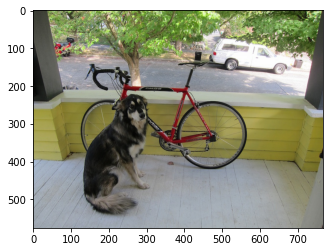

In [23]:
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./dog_example.jpg', 'rb').read(), channels=3) # this is tensor flow function image.decode
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

In [20]:
class_names

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
## Run inference and display result

	dog, 0.9977410435676575, [0.15920368 0.38621816 0.41723308 0.9451945 ]
	bicycle, 0.9901672005653381, [0.1532267 0.2177043 0.7412542 0.7511742]
	truck, 0.9378405213356018, [0.6156051  0.15119573 0.90188897 0.2891039 ]


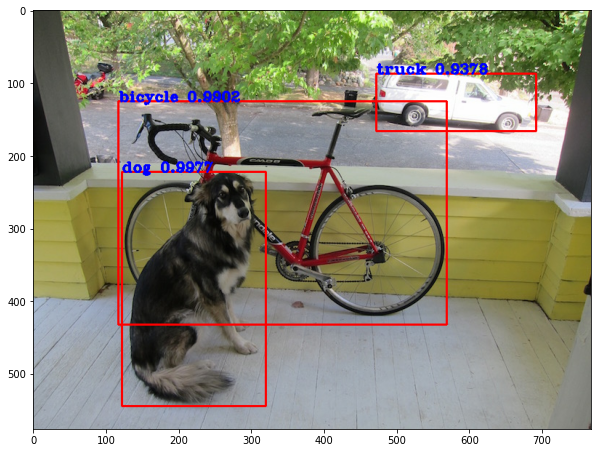

In [ ]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)